In [4]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Carregar o arquivo de áudio
filename = 'Avicii_tn.mp3'
y, sr = librosa.load(filename)

## A Transformada de Fourier é usada para converter o sinal do domínio do tempo para o domínio da frequência.
- A função librosa.stft calcula a Short-Time Fourier Transform (STFT), que permite a visualização das frequências ao longo do tempo. Já a librosa.amplitude_to_db converte a magnitude da transformada em decibéis para facilitar a interpretação.

In [5]:
# Obter a Transformada de Fourier
D = np.abs(librosa.stft(y))

# Converter para escala logarítmica (dB)
DB = librosa.amplitude_to_db(D, ref=np.max)

## Vizualinzando os espectograma

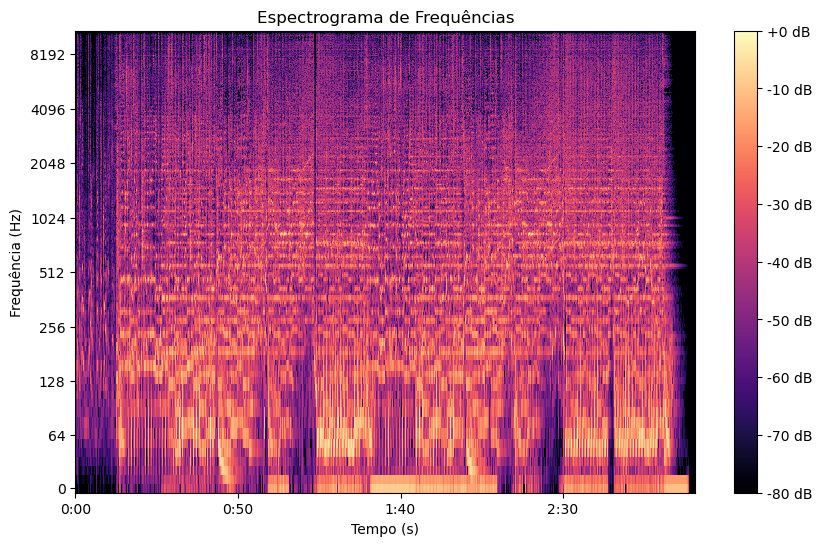

In [6]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de Frequências')
plt.xlabel('Tempo (s)')
plt.ylabel('Frequência (Hz)')
plt.show()


## Analizando frequencias dominantes

- Se você quiser identificar as frequências dominantes de um arquivo de áudio, você pode calcular o CQT (Constant-Q Transform) ou simplesmente a transformada STFT.

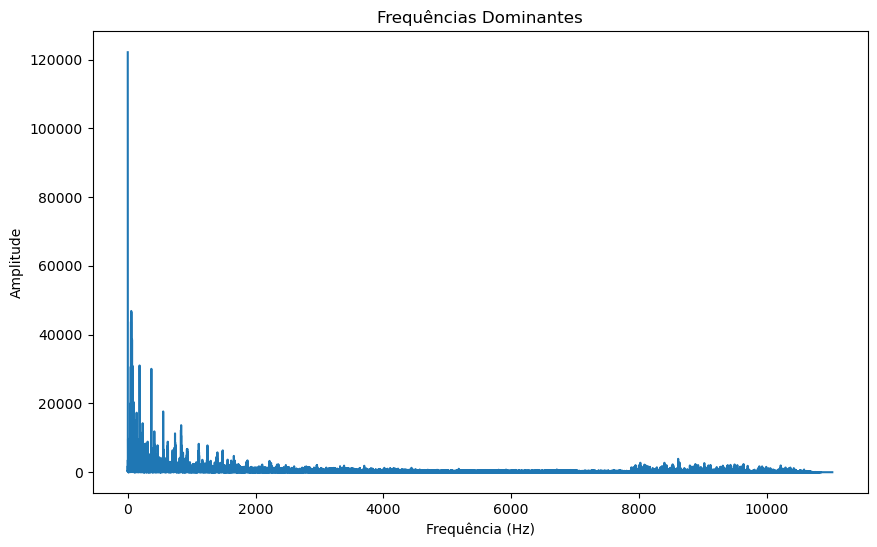

In [7]:
frequencias = np.fft.fftfreq(len(y), 1/sr)
espectro = np.abs(np.fft.fft(y))

# Visualizar as frequências dominantes
plt.figure(figsize=(10, 6))
plt.plot(frequencias[:len(frequencias)//2], espectro[:len(espectro)//2])
plt.title('Frequências Dominantes')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.show()


In [8]:
# Carregar o arquivo de áudio
filename = 'YoshuaEm_MM.mp3'
y, sr = librosa.load(filename)

# Definir o número de bandas de frequência desejadas (ex: 6 bandas)
n_bands = 6

# Calcular o STFT (Short-Time Fourier Transform) para obter as frequências
S = np.abs(librosa.stft(y))

# Converter para escala mel para análise mais próxima à percepção humana
mel_spec = librosa.feature.melspectrogram(S=S, sr=sr, n_mels=n_bands)

# Calcular a média de energia para cada banda ao longo do tempo
energy_per_band = np.mean(mel_spec, axis=1)

# Normalizar os valores de energia (para que fiquem entre 0 e 1)
normalized_energy = energy_per_band / np.max(energy_per_band)

# Estes valores de 'normalized_energy' podem ser passados para o shader
print(normalized_energy)

[1.         0.3346559  0.23769078 0.14899385 0.07074311 0.04711979]
